In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Figures

In this notebook, we present the codes for the plots presented in the Case Assignment for the Advanced Econometrics course, part 1.

## Fixed Effects properties

In [3]:
# Read results data for FE, one-step GMM, two-step GMM
result_FE_MC = pd.read_excel('Case assignment - Results.xlsx', sheet_name='result_FE_MC')
result_GMM_onestep = pd.read_excel('Case assignment - Results.xlsx', sheet_name='result_onestep_MC')
result_GMM_twostep = pd.read_excel('Case assignment - Results.xlsx', sheet_name='result_twostep_MC')

In [4]:
# Calculate the difference between the estimted rho and the analytical rho
result_FE_MC['diff'] = result_FE_MC['result_rho'] - result_FE_MC['rho']
result_GMM_onestep['diff'] = result_GMM_onestep['result'] - result_GMM_onestep['rho']
result_GMM_twostep['diff'] = result_GMM_twostep['result'] - result_GMM_twostep['rho']

result_GMM_twostep.head()

,rho,T,N,result,result_ese,result_tse,size,diff
0,0.0,4,10,-0.05662,0.39960,0.560337,0.26,-0.05662
1,0.0,4,100,0.01067,0.13795,0.161756,0.08,0.01067
2,0.0,10,10,0.02252,0.12557,0.171666,0.16,0.02252
3,0.0,10,100,0.00295,0.04738,0.053183,0.06,0.00295
4,0.0,20,10,-0.00129,0.07843,0.094535,0.11,-0.00129


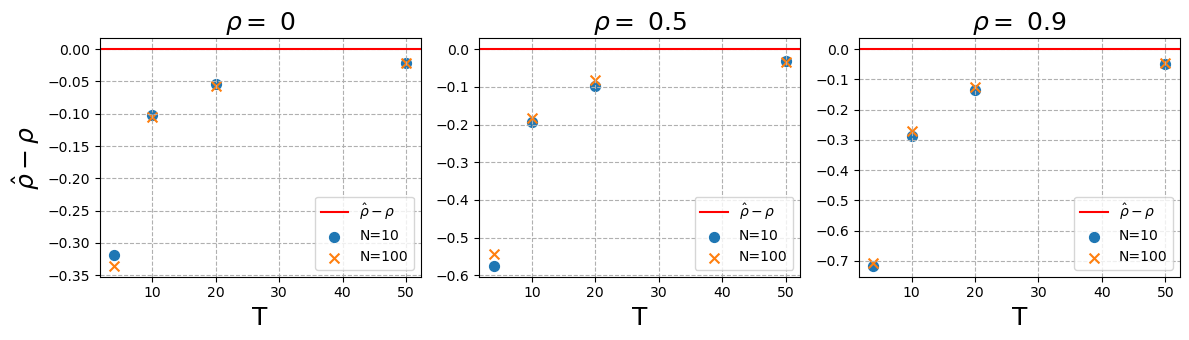

In [5]:
# Plot results of the Fixed Effects estimator
fig, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
ax_list = ax_list.ravel()
rho_list = [0, 0.5, 0.9]

FE_N10 = result_FE_MC[result_FE_MC['N']==10]
FE_N100 = result_FE_MC[result_FE_MC['N']==100]

alpha = 1
count = 1

for rho, ax in zip(rho_list, ax_list):
    
    params_10  = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'o', 'color': 'C0', 
                  'label': 'N=10',  'alpha': alpha, 'ax': ax}
    params_100 = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'x', 'color': 'C1', 
                  'label': 'N=100', 'alpha': alpha, 'ax': ax}
    
    ax.axhline(y=0, color='red', label=r'$\hat{\rho}-\rho$')#, alpha=0.6)
    
    temp_df_10  = FE_N10[FE_N10['rho']==rho]
    temp_df_100 = FE_N100[FE_N100['rho']==rho]# Plot results of the Fixed Effects estimator
    
    temp_df_10.plot(**params_10)
    
    temp_df_100.plot(**params_100)
    
    if count==1:
        ax.set_ylabel(r'$\hat{\rho}-\rho$', fontsize=18)
    else:
        ax.set_ylabel(None)
    count += 1
    ax.grid(linestyle='--')
    ax.set_title(fr'$\rho =$ {rho}', fontsize=18)
    ax.set_xlabel('T', fontsize=18)
    
    ax.legend()

plt.tight_layout()
#plt.savefig('fig_01_FE_properties.pdf')
#plt.savefig('fig_01_FE_properties.png')
#plt.savefig('fig_01_FE_properties.svg')
plt.show()

# FE: Compare standard errors

Compare the mean of etimated standard errors $\hat{se}(\hat{\rho}_{FE})$ to true standard errors $se(\hat{\rho}_{FE})$ 

Estimated se (mean): 0.0952
True se (mean): 0.0690
Estimated - True std. error: 0.0262
pct_diff: 38.0467


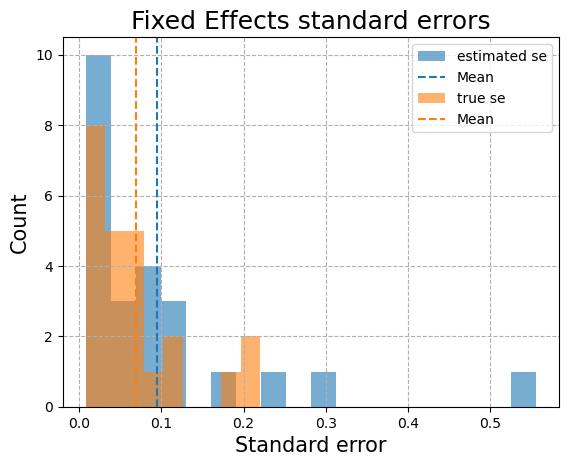

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fs = 15
alf = 0.6
mean_ese = result_FE_MC['result_ese'].mean()
mean_tse = result_FE_MC['result_tse'].mean()
ax.hist(result_FE_MC['result_ese'].values, bins=18, alpha=alf, label='estimated se', color='C0')
ax.axvline(x=mean_ese, linestyle='--', color='C0', label='Mean')
ax.hist(result_FE_MC['result_tse'].values, bins=9, alpha=alf, label='true se', color='C1')
ax.axvline(x=mean_tse, linestyle='--', color='C1', label='Mean')
#ax.hist(jackknife_df['diff'].values, bins=18, alpha=alf, color='C7', label='Jackknife')#, histtype='step')
#ax.hist(result_FE_MC['diff'].values, bins=10, alpha=alf, color='C4', label='Non-corrected')#, histtype='step')
ax.grid(linestyle='--')
ax.set_xlabel(r'Standard error', fontsize=fs)
ax.set_ylabel(r'Count', fontsize=fs)
ax.set_title('Fixed Effects standard errors', fontsize=fs+3)
ax.legend(loc='best')

#plt.savefig('fig_FE_se_comparison.pdf')
#plt.savefig('fig_FE_se_comparison.png')
#plt.savefig('fig_FE_se_comparison.svg')

print(f'Estimated se (mean): {mean_ese:.4f}')
print(f'True se (mean): {mean_tse:.4f}')
print(f'Estimated - True std. error: {mean_ese-mean_tse:.4f}')
print(f'pct_diff: {100*(mean_ese-mean_tse)/mean_tse:.4f}')
plt.show()

## Jackknife bias correction

## Histogram plot

We begin by plotting the difference between the bias-corrected estimate and the original estimates produced by the FE estimator

In [7]:
jackknife_df = pd.read_csv('jackknife_bias_correction.csv', sep=',')

jackknife_df['diff'] = jackknife_df['result_rho'] - jackknife_df['rho']
jackknife_df

,rho,T,N,result_rho,result_se,result_se_FE,diff
0,0.0,4,10,0.008605,0.180916,0.190565,0.008605
1,0.0,10,10,-0.088783,0.057933,0.104345,-0.088783
2,0.0,20,10,0.112423,0.060056,0.072025,0.112423
3,0.0,50,10,-0.060786,0.047908,0.045102,-0.060786
4,0.0,4,100,0.023623,0.067994,0.059044,0.023623
5,0.0,10,100,0.002124,0.032751,0.033210,0.002124
6,0.0,20,100,-0.031535,0.024851,0.022915,-0.031535
7,0.0,50,100,-0.012548,0.013771,0.014264,-0.012548
8,0.5,4,10,0.705417,0.192299,0.197047,0.205417
9,0.5,10,10,0.387925,0.088158,0.104430,-0.112075


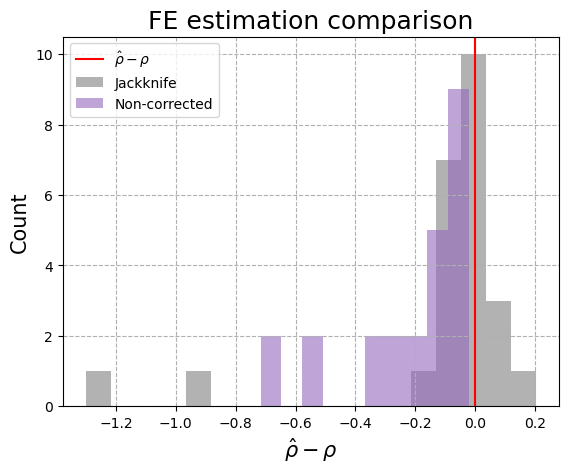

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.axvline(x=0, color='red', label=r'$\hat{\rho}-\rho$')
fs = 15
alf = 0.6
ax.hist(jackknife_df['diff'].values, bins=18, alpha=alf, color='C7', label='Jackknife')
ax.hist(result_FE_MC['diff'].values, bins=10, alpha=alf, color='C4', label='Non-corrected')
ax.grid(linestyle='--')
ax.set_xlabel(r'$\hat{\rho}-\rho$', fontsize=fs)
ax.set_ylabel(r'Count', fontsize=fs)
ax.legend(loc='best')
ax.set_title('FE estimation comparison', fontsize=fs+3)
#plt.savefig('fig_03_distribution.pdf')
#plt.savefig('fig_03_distribution.png')
#plt.savefig('fig_03_distribution.svg')
plt.show()

## Jackknife results plot

Now, we plot the output results produced by the jackknife, as done in the first figure

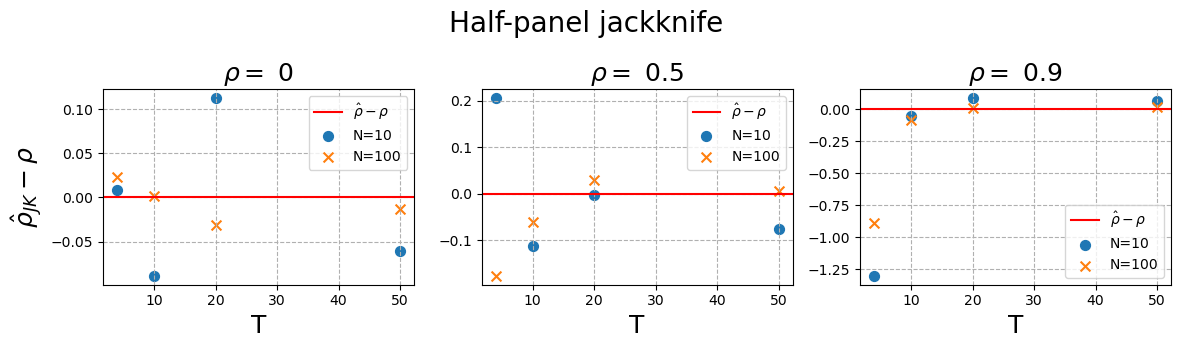

In [11]:
fig, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
ax_list = ax_list.ravel()
rho_list = [0, 0.5, 0.9]

jk_N10 = jackknife_df[jackknife_df['N']==10]
jk_N100 = jackknife_df[jackknife_df['N']==100]

alpha = 1
count = 1

for rho, ax in zip(rho_list, ax_list):
    
    params_10  = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'o', 'color': 'C0', 
                  'label': 'N=10',  'alpha': alpha, 'ax': ax}
    params_100 = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'x', 'color': 'C1', 
                  'label': 'N=100', 'alpha': alpha, 'ax': ax}
    
    ax.axhline(y=0, color='red', label=r'$\hat{\rho}-\rho$')#, alpha=0.6)
    
    temp_df_10  = jk_N10[jk_N10['rho']==rho]
    temp_df_100 = jk_N100[jk_N100['rho']==rho]

    temp_df_10.plot(**params_10)
    
    temp_df_100.plot(**params_100)
    
    if count==1:
        ax.set_ylabel(r'$\hat{\rho}_{JK}-\rho$', fontsize=18)
    else:
        ax.set_ylabel(None)
    count += 1
    ax.grid(linestyle='--')
    ax.set_title(fr'$\rho =$ {rho}', fontsize=18)
    ax.set_xlabel(r'T', fontsize=18)
    
    ax.legend()

fig.suptitle('Half-panel jackknife', fontsize=20)
plt.tight_layout()
#plt.savefig('fig_jackknife_bias_correction.pdf')
#plt.savefig('fig_jackknife_bias_correction.png')
#plt.savefig('fig_jackknife_bias_correction.svg')
plt.show()

In [12]:
mean_se = jackknife_df['result_se'].mean()
mean_FE_se = jackknife_df['result_se_FE'].mean()

print(f'Mean se: {mean_se: .4f} ** Mean FE se: {mean_FE_se: .4f} ** diff: {mean_se-mean_FE_se: .4f}')

Mean se:  0.0577 ** Mean FE se:  0.0580 ** diff: -0.0002


# GMM plots

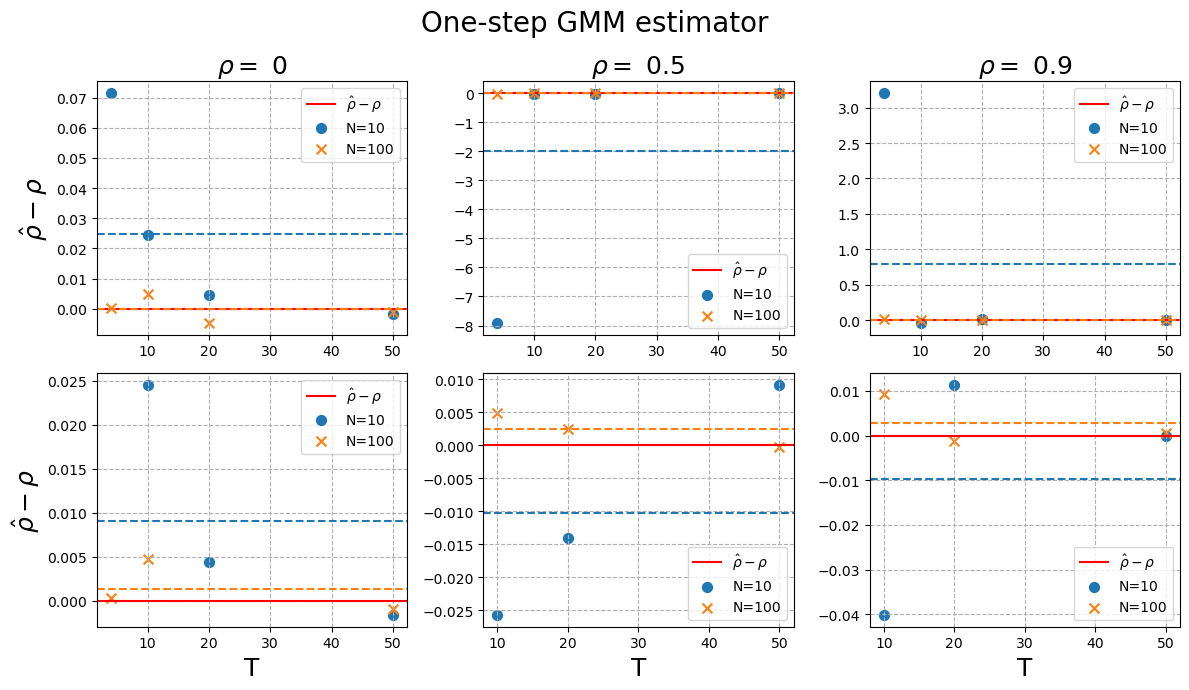

In [79]:
# Plot results of the Fixed Effects estimator
fig, ax_list = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
ax_list = ax_list.ravel()
rho_list = [0, 0.5, 0.9, 0, 0.5, 0.9]

GMM_1s_N10 = result_GMM_onestep[result_GMM_onestep['N']==10]
GMM_1s_N100 = result_GMM_onestep[result_GMM_onestep['N']==100]

alpha = 1
count = 1

for rho, ax in zip(rho_list, ax_list):
    
    params_10  = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'o', 'color': 'C0', 
                  'label': 'N=10',  'alpha': alpha, 'ax': ax}
    params_100 = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'x', 'color': 'C1', 
                  'label': 'N=100', 'alpha': alpha, 'ax': ax}
    
    ax.axhline(y=0, color='red', label=r'$\hat{\rho}-\rho$')#, alpha=0.6)
    
    temp_df_10  = GMM_1s_N10[GMM_1s_N10['rho']==rho]
    temp_df_100 = GMM_1s_N100[GMM_1s_N100['rho']==rho]# Plot results of the Fixed Effects estimator
    
    mean10 = temp_df_10['diff'].mean()
    mean100 = temp_df_100['diff'].mean()
    
    # REMOVE OUTLIERS ON THE BOTTOM ROWS
    if count>3:
        temp_df_10 = temp_df_10.drop(index=temp_df_10['diff'].abs().idxmax())
        temp_df_100 = temp_df_100.drop(index=temp_df_100['diff'].abs().idxmax())
        mean10 = temp_df_10['diff'].mean()
        mean100 = temp_df_100['diff'].mean()
        ax.set_xlabel('T', fontsize=18)
    
    
    temp_df_10.plot(**params_10)
    temp_df_100.plot(**params_100)
    ax.axhline(y=mean10, color='C0', linestyle='--')#, label='Mean')
    ax.axhline(y=mean100, color='C1', linestyle='--')#, label='Mean')
    
    
    if (count==1) | (count==4):
        ax.set_ylabel(r'$\hat{\rho}-\rho$', fontsize=18)
    else:
        ax.set_ylabel(None)
    
    ax.grid(linestyle='--')
    
    ax.set_title(fr'$\rho =$ {rho}', fontsize=18)
    
    
    if count>3:
        ax.set_title(None)
    else:
        ax.set_xlabel(None)
    
    count += 1
    
    ax.legend()

fig.suptitle('One-step GMM estimator', fontsize=20)
plt.tight_layout()
#plt.savefig('fig_onestep_GMM.pdf')
#plt.savefig('fig_onestep_GMM.png')
#plt.savefig('fig_onestep_GMM.svg')
plt.show()

## One-step GMM: Mean difference

In [23]:
print('*** ONE-STEP GMM ***')

# Separate according to different N
gmm_1s_10  = result_GMM_onestep[result_GMM_onestep['N']==10]
mean_val = gmm_1s_10['diff'].mean()
print(f'Mean N=10 {mean_val:.4f}')
max_idx    = gmm_1s_10['diff'].abs().idxmax()
gmm_1s_10  = gmm_1s_10.drop(index=max_idx)
mean_val   = gmm_1s_10['diff'].mean()
print(f'Mean N=10 {mean_val:.4f} NO OUTLIER')

gmm_1s_100 = result_GMM_onestep[result_GMM_onestep['N']==100]
print(f'Mean N=100 {mean_val:.4f}')
max_idx    = gmm_1s_100['diff'].abs().idxmax()
gmm_1s_100 = gmm_1s_100.drop(index=max_idx)
mean_val   = gmm_1s_100['diff'].mean()
print(f'Mean N=100 {mean_val:.4f} NO OUTLIER\n')

# Separate according to different rho
gmm_1s_r0  = result_GMM_onestep[result_GMM_onestep['rho']==0.0]
print(f'Mean rho=0 {mean_val:.4f}')
max_idx    = gmm_1s_r0['diff'].abs().idxmax()
gmm_1s_r0  = gmm_1s_r0.drop(index=max_idx)
mean_val   = gmm_1s_r0['diff'].mean()
print(f'Mean rho=0 {mean_val:.4f} NO OUTLIER')

gmm_1s_r05  = result_GMM_onestep[result_GMM_onestep['rho']==0.5]
print(f'Mean rho=0.5 {mean_val:.4f}')
max_idx     = gmm_1s_r05['diff'].abs().idxmax()
gmm_1s_r05  = gmm_1s_r05.drop(index=max_idx)
mean_val    = gmm_1s_r05['diff'].mean()
print(f'Mean rho=0.5 {mean_val:.4f} NO OUTLIER')

gmm_1s_r09 = result_GMM_onestep[result_GMM_onestep['rho']==0.9]
print(f'Mean rho=0.9 {mean_val:.4f}')
max_idx    = gmm_1s_r09['diff'].abs().idxmax()
gmm_1s_r09 = gmm_1s_r09.drop(index=max_idx)
mean_val   = gmm_1s_r09['diff'].mean()
print(f'Mean rho=0.9 {mean_val:.4f} NO OUTLIER')

Mean N=10 -0.3893
Mean N=10 0.2952 NO OUTLIER
Mean N=100 0.2952
Mean N=100 0.0001 NO OUTLIER

Mean rho=0 0.0001
Mean rho=0 0.0038 NO OUTLIER
Mean rho=0.5 0.0038
Mean rho=0.5 -0.0053 NO OUTLIER
Mean rho=0.9 -0.0053
Mean rho=0.9 0.0000 NO OUTLIER


## Two-step GMM

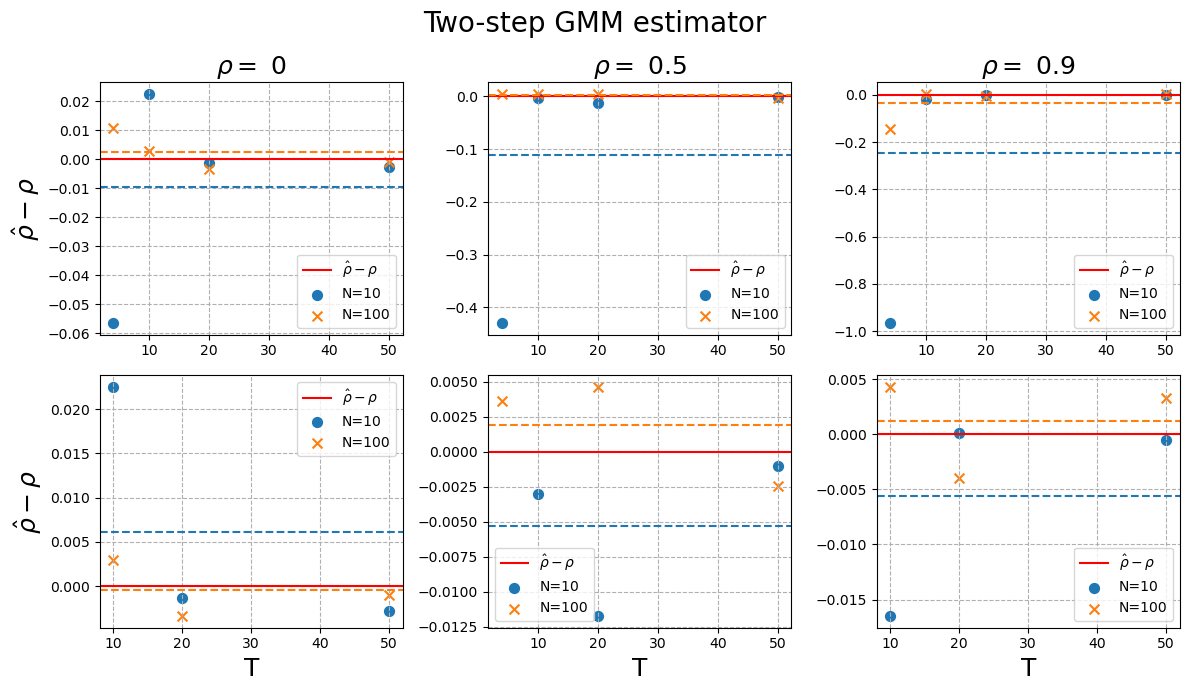

In [80]:
# Plot results of the Fixed Effects estimator
fig, ax_list = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
ax_list = ax_list.ravel()
rho_list = [0, 0.5, 0.9, 0, 0.5, 0.9]

GMM_1s_N10 = result_GMM_twostep[result_GMM_twostep['N']==10]
GMM_1s_N100 = result_GMM_twostep[result_GMM_twostep['N']==100]

alpha = 1
count = 1

for rho, ax in zip(rho_list, ax_list):
    
    params_10  = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'o', 'color': 'C0', 
                  'label': 'N=10',  'alpha': alpha, 'ax': ax}
    params_100 = {'kind': 'scatter', 'x': 'T', 'y': 'diff', 's': 50, 'marker': 'x', 'color': 'C1', 
                  'label': 'N=100', 'alpha': alpha, 'ax': ax}
    
    ax.axhline(y=0, color='red', label=r'$\hat{\rho}-\rho$')#, alpha=0.6)
    
    temp_df_10  = GMM_1s_N10[GMM_1s_N10['rho']==rho]
    temp_df_100 = GMM_1s_N100[GMM_1s_N100['rho']==rho]# Plot results of the Fixed Effects estimator
    
    mean10 = temp_df_10['diff'].mean()
    mean100 = temp_df_100['diff'].mean()
    
    
    # REMOVE OUTLIERS ON THE BOTTOM ROWS
    if count>3:
        temp_df_10 = temp_df_10.drop(index=temp_df_10['diff'].abs().idxmax())
        temp_df_100 = temp_df_100.drop(index=temp_df_100['diff'].abs().idxmax())
        mean10 = temp_df_10['diff'].mean()
        mean100 = temp_df_100['diff'].mean()
        ax.set_xlabel('T', fontsize=18)
    
    
    temp_df_10.plot(**params_10)
    temp_df_100.plot(**params_100)
    ax.axhline(y=mean10, color='C0', linestyle='--')#, label='Mean')
    ax.axhline(y=mean100, color='C1', linestyle='--')#, label='Mean')
    
    if (count==1) | (count==4):
        ax.set_ylabel(r'$\hat{\rho}-\rho$', fontsize=18)
    else:
        ax.set_ylabel(None)
    
    ax.grid(linestyle='--')
    
    ax.set_title(fr'$\rho =$ {rho}', fontsize=18)
    
    
    if count>3:
        ax.set_title(None)
    else:
        ax.set_xlabel(None)
    
    count += 1
    
    ax.legend()

fig.suptitle('Two-step GMM estimator', fontsize=20)
plt.tight_layout()
#plt.savefig('fig_twostep_GMM.pdf')
#plt.savefig('fig_twostep_GMM.png')
#plt.savefig('fig_twostep_GMM.svg')
plt.show()

In [66]:
print('*** TWO-STEP GMM ***')

# Separate according to different N
gmm_1s_10  = result_GMM_twostep[result_GMM_twostep['N']==10]
mean_val = gmm_1s_10['diff'].mean()
print(f'Mean N=10 {mean_val:.4f}')
max_idx    = gmm_1s_10['diff'].abs().idxmax()
gmm_1s_10  = gmm_1s_10.drop(index=max_idx)
mean_val   = gmm_1s_10['diff'].mean()
print(f'Mean N=10 {mean_val:.4f} NO OUTLIER')

gmm_1s_100 = result_GMM_twostep[result_GMM_twostep['N']==100]
print(f'Mean N=100 {mean_val:.4f}')
max_idx    = gmm_1s_100['diff'].abs().idxmax()
gmm_1s_100 = gmm_1s_100.drop(index=max_idx)
mean_val   = gmm_1s_100['diff'].mean()
print(f'Mean N=100 {mean_val:.4f} NO OUTLIER\n')

# Separate according to different rho
gmm_1s_r0  = result_GMM_twostep[result_GMM_twostep['rho']==0.0]
print(f'Mean rho=0 {mean_val:.4f}')
max_idx    = gmm_1s_r0['diff'].abs().idxmax()
gmm_1s_r0  = gmm_1s_r0.drop(index=max_idx)
mean_val   = gmm_1s_r0['diff'].mean()
print(f'Mean rho=0 {mean_val:.4f} NO OUTLIER')

gmm_1s_r05  = result_GMM_twostep[result_GMM_twostep['rho']==0.5]
print(f'Mean rho=0.5 {mean_val:.4f}')
max_idx     = gmm_1s_r05['diff'].abs().idxmax()
gmm_1s_r05  = gmm_1s_r05.drop(index=max_idx)
mean_val    = gmm_1s_r05['diff'].mean()
print(f'Mean rho=0.5 {mean_val:.4f} NO OUTLIER')

gmm_1s_r09 = result_GMM_twostep[result_GMM_twostep['rho']==0.9]
print(f'Mean rho=0.9 {mean_val:.4f}')
max_idx    = gmm_1s_r09['diff'].abs().idxmax()
gmm_1s_r09 = gmm_1s_r09.drop(index=max_idx)
mean_val   = gmm_1s_r09['diff'].mean()
print(f'Mean rho=0.9 {mean_val:.4f} NO OUTLIER')

*** TWO-STEP GMM ***
Mean N=10 -0.1223
Mean N=10 -0.0455 NO OUTLIER
Mean N=100 -0.0455
Mean N=100 0.0021 NO OUTLIER

Mean rho=0 0.0021
Mean rho=0 0.0039 NO OUTLIER
Mean rho=0.5 0.0039
Mean rho=0.5 -0.0007 NO OUTLIER
Mean rho=0.9 -0.0007
Mean rho=0.9 -0.0228 NO OUTLIER


Mean se GMM ONESTEP:  0.1192
Mean se GMM TWOSTEP: 0.2761
Mean se FE:  0.0690


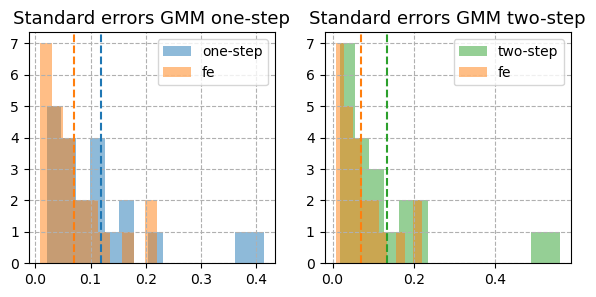

In [83]:
# Compare true se with FE standard deviation

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# ONE STEP GMM

idx_max = result_GMM_onestep['result_tse'].abs().idxmax()
gmm_no_outliers = result_GMM_onestep.drop(index=idx_max)
idx_max = gmm_no_outliers['result_tse'].abs().idxmax()
gmm_no_outliers = gmm_no_outliers.drop(index=idx_max)
idx_max = gmm_no_outliers['result_tse'].abs().idxmax()
gmm_no_outliers = gmm_no_outliers.drop(index=idx_max)

ax[0].hist(gmm_no_outliers['result_tse'].values, color='C0', alpha=0.5, bins=15, label='one-step')
ax[0].hist(result_FE_MC['result_tse'].values, color='C1', alpha=0.5, bins=10, label='fe')
ax[0].grid(linestyle='--')

mean = gmm_no_outliers["result_tse"].mean()
ax[0].axvline(x=mean, linestyle='--', color='C0')
mean = result_FE_MC["result_tse"].mean()
ax[0].axvline(x=mean, linestyle='--', color='C1')
ax[0].set_title('Standard errors GMM one-step', fontsize=13)
ax[0].legend()

print(f'Mean se GMM ONESTEP: {gmm_no_outliers["result_tse"].mean(): .4f}')

# TWO STEP GMM

idx_max = result_GMM_twostep['result_tse'].abs().idxmax()
gmm_no_outliers = result_GMM_twostep.drop(index=idx_max)
idx_max = gmm_no_outliers['result_tse'].abs().idxmax()
gmm_no_outliers = gmm_no_outliers.drop(index=idx_max)
idx_max = gmm_no_outliers['result_tse'].abs().idxmax()
gmm_no_outliers = gmm_no_outliers.drop(index=idx_max)

ax[1].hist(gmm_no_outliers['result_tse'].values, color='C2', alpha=0.5, bins=15, label='two-step')
ax[1].hist(result_FE_MC['result_tse'].values, color='C1', alpha=0.5, bins=10, label='fe')
ax[1].grid(linestyle='--')

mean = gmm_no_outliers["result_tse"].mean()
ax[1].axvline(x=mean, linestyle='--', color='C2')
mean = result_FE_MC["result_tse"].mean()
ax[1].axvline(x=mean, linestyle='--', color='C1')
ax[1].set_title('Standard errors GMM two-step', fontsize=13)
ax[1].legend()


#print(f'Mean se GMM ONESTEP: {gmm_no_outliers["result_tse"].mean()}')
print(f'Mean se GMM TWOSTEP: {result_GMM_twostep["result_tse"].mean():.4f}')
print(f'Mean se FE:  {result_FE_MC["result_tse"].mean():.4f}')

#plt.savefig('fig_se_GMM_FE.svg')
#plt.savefig('fig_se_GMM_FE.png')
#plt.savefig('fig_se_GMM_FE.pdf')

plt.show()

In [84]:
print(f'one-step diff: {0.1192-0.0690}')
print(f'two-step diff: {0.2761-0.0690}')

one-step diff: 0.050199999999999995
two-step diff: 0.2071


In [95]:
ese_mean_1s = result_GMM_onestep['result_ese'].mean() # mean of estimated se 1step
tse_mean_1s = result_GMM_onestep['result_tse'].mean() # mean of theoretical se 1step
print(f'ESE: {ese_mean_1s: .4f}\nTSE: {tse_mean_1s: .4f}\nDIFF(ESE-TSE): {ese_mean_1s-tse_mean_1s: .4f}\n')

print('-- Remove MAX --')
temp_df = result_GMM_onestep.drop(index=result_GMM_onestep['result_ese'].abs().idxmax())
ese_mean_1s = temp_df['result_ese'].mean() # mean of estimated se 1step
tse_mean_1s = temp_df['result_tse'].mean() # mean of theoretical se 1step
print(f'ESE: {ese_mean_1s: .4f}\nTSE: {tse_mean_1s: .4f}\nDIFF(ESE-TSE): {ese_mean_1s-tse_mean_1s: .4f}\n')

print('-- Remove MAX again --')
temp_df = temp_df.drop(index=temp_df['result_ese'].abs().idxmax())
ese_mean_1s = temp_df['result_ese'].mean() # mean of estimated se 1step
tse_mean_1s = temp_df['result_tse'].mean() # mean of theoretical se 1step
print(f'ESE: {ese_mean_1s: .4f}\nTSE: {tse_mean_1s: .4f}\nDIFF(ESE-TSE): {ese_mean_1s-tse_mean_1s: .4f}\n')

ESE:  306.0061
TSE:  4.2480
DIFF(ESE-TSE):  301.7581

-- Remove MAX --
ESE:  12.3816
TSE:  0.9593
DIFF(ESE-TSE):  11.4223

-- Remove MAX again --
ESE:  0.1649
TSE:  0.1867
DIFF(ESE-TSE): -0.0217



In [96]:
### TWO STEP GMM

ese_mean_1s = result_GMM_twostep['result_ese'].mean() # mean of estimated se 1step
tse_mean_1s = result_GMM_twostep['result_tse'].mean() # mean of theoretical se 1step
print(f'ESE: {ese_mean_1s: .4f}\nTSE: {tse_mean_1s: .4f}\nDIFF(ESE-TSE): {ese_mean_1s-tse_mean_1s: .4f}\n')

print('-- Remove MAX --')
temp_df = result_GMM_twostep.drop(index=result_GMM_twostep['result_ese'].abs().idxmax())
ese_mean_1s = temp_df['result_ese'].mean() # mean of estimated se 1step
tse_mean_1s = temp_df['result_tse'].mean() # mean of theoretical se 1step
print(f'ESE: {ese_mean_1s: .4f}\nTSE: {tse_mean_1s: .4f}\nDIFF(ESE-TSE): {ese_mean_1s-tse_mean_1s: .4f}\n')

print('-- Remove MAX again --')
temp_df = temp_df.drop(index=temp_df['result_ese'].abs().idxmax())
ese_mean_1s = temp_df['result_ese'].mean() # mean of estimated se 1step
tse_mean_1s = temp_df['result_tse'].mean() # mean of theoretical se 1step
print(f'ESE: {ese_mean_1s: .4f}\nTSE: {tse_mean_1s: .4f}\nDIFF(ESE-TSE): {ese_mean_1s-tse_mean_1s: .4f}\n')

ESE:  0.3272
TSE:  0.2761
DIFF(ESE-TSE):  0.0511

-- Remove MAX --
ESE:  0.1863
TSE:  0.1995
DIFF(ESE-TSE): -0.0131

-- Remove MAX again --
ESE:  0.1398
TSE:  0.1617
DIFF(ESE-TSE): -0.0219

